In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gp_pulses = pd.read_csv('crab_gp_kaz_pulses_2020-03-24.csv',  sep='\t')
crab_sessoins = pd.read_csv('crab_session_kaz_2020-03-24.csv',  sep='\t')

In [3]:
gp_pulses['Time_series'] = pd.to_datetime(gp_pulses['Date'], format='%d.%m.%Y', errors='ignore')
gp_pulses = gp_pulses.set_index('Time_series')
crab_sessoins['Time_series'] = pd.to_datetime(crab_sessoins['Date'], format='%d.%m.%Y', errors='ignore')
crab_sessoins = crab_sessoins.set_index('Time_series')

In [4]:
gp_pulses['Count of GP, u'] = 1
gp_crab_m_full = gp_pulses['Count of GP, u'].resample('M').sum().to_frame()
gp_crab_m_ses = crab_sessoins['Session'].resample('M').sum().to_frame()
result_crab = gp_crab_m_full.join(gp_crab_m_ses, how='outer')

In [5]:
result_crab['pase_GP']  = np.divide(
    result_crab['Count of GP, u'], 
    result_crab['Session']*3.3841152) # в минутах

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


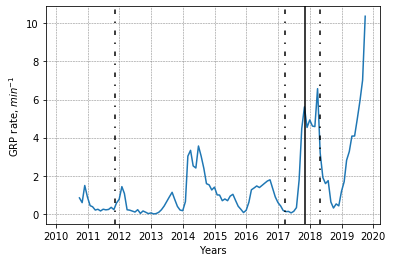

In [6]:
plt.close()
plt.ylabel(r'GRP rate, $min^{-1}$')
plt.xlabel('Years')
plt.plot(result_crab['pase_GP'])
plt.axvline('2011-11-10', color='black', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-03-27', color='black', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-11-07', color='black') # strongest glitch
plt.axvline('2018-04-29', color='black', ls=(0, (3, 5, 1, 5)))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

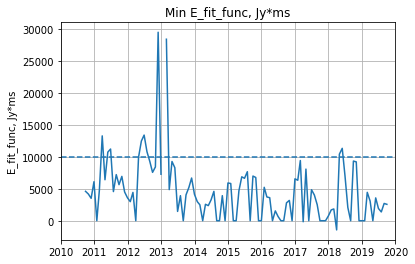

In [7]:
gp_table_full_E_m = gp_pulses['E_fit_func, Jy*ms'].resample('M').min().to_frame()
plt.close()
plt.title('Min E_fit_func, Jy*ms')
plt.ylabel('E_fit_func, Jy*ms')
plt.axhline(10000, ls='--')
plt.plot(gp_table_full_E_m['E_fit_func, Jy*ms']) #/np.max(gp_table_full_E_m['E_fit_func, Jy*ms']))
plt.xlim('2010', '2020')
plt.grid()
plt.show()

In [8]:
gp_table_E_cut = gp_pulses.where(
    gp_pulses['E_fit_func, Jy*ms'] > 10000).dropna().reset_index(drop=True)
gp_table_E_cut['Time_series'] = pd.to_datetime(
    gp_table_E_cut['Date'], format='%d.%m.%Y', errors='ignore')
gp_table_E_cut = gp_table_E_cut.set_index('Time_series')

In [9]:
gp_table_E_cut_m = gp_table_E_cut['Count of GP, u'].resample('M').sum().to_frame()
result_crab = gp_table_E_cut_m.join(gp_crab_m_ses, how='outer')

In [10]:
result_crab['pase_GP']  = np.divide(
    result_crab['Count of GP, u'], 
    result_crab['Session']*3.3841152) # в минутах

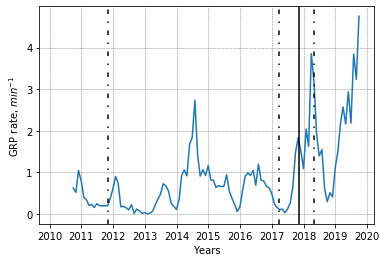

In [11]:
plt.close()
plt.ylabel(r'GRP rate, $min^{-1}$')
plt.xlabel('Years')
plt.plot(result_crab['pase_GP'])
plt.axvline('2011-11-10', color='black', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-03-27', color='black', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-11-07', color='black') # strongest glitch
plt.axvline('2018-04-29', color='black', ls=(0, (3, 5, 1, 5)))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

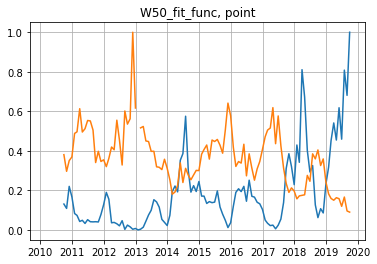

In [12]:
gp_table_full_w_m = gp_table_E_cut['W50_fit_func, point'].resample('M').mean().to_frame()
plt.close()
plt.title('W50_fit_func, point')
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.plot(gp_table_full_w_m['W50_fit_func, point']/np.max(gp_table_full_w_m['W50_fit_func, point']))
plt.grid()
plt.show()

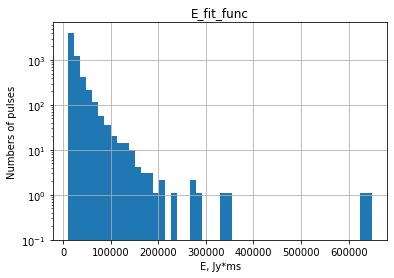

In [13]:
fig, ax = plt.subplots()
gp_table_E_cut['E_fit_func, Jy*ms'].hist(ax=ax, bins=50, bottom=0.1)
ax.set_title('E_fit_func')
ax.set_xlabel('E, Jy*ms')
ax.set_ylabel('Numbers of pulses')
ax.set_yscale('log')
#ax.set_xscale('log')

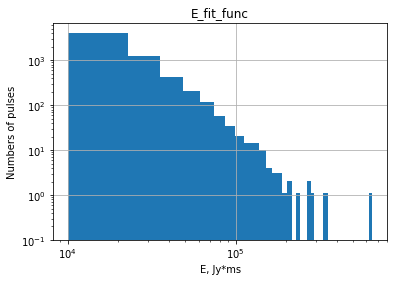

In [14]:
fig, ax = plt.subplots()
gp_table_E_cut['E_fit_func, Jy*ms'].hist(ax=ax, bins=50, bottom=0.1)
ax.set_title('E_fit_func')
ax.set_xlabel('E, Jy*ms')
ax.set_ylabel('Numbers of pulses')
ax.set_yscale('log')
ax.set_xscale('log')